In [1]:
import pandas as pd

In [2]:
import pandas as pd

# ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑŸÖŸÑŸÅ
xls = pd.ExcelFile(r"C:\Users\ebrah\Downloads\Social-Media-Project (1).xlsx")

# ÿπÿ±ÿ∂ ÿ£ÿ≥ŸÖÿßÿ° ÿßŸÑÿ¥Ÿäÿ™ÿßÿ™ ŸÑŸÑÿ™ÿ£ŸÉÿØ
print("Sheets:", xls.sheet_names)

# ÿØŸÖÿ¨ ŸÉŸÑ ÿßŸÑÿ¥Ÿäÿ™ÿßÿ™ ŸÅŸä DataFrame Ÿàÿßÿ≠ÿØ
all_data = pd.DataFrame()

for sheet in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet)
    df['Source_Sheet'] = sheet  # ŸÜÿ∂ŸäŸÅ ÿπŸÖŸàÿØ ÿπŸÑÿ¥ÿßŸÜ ŸÜÿπÿ±ŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ŸÉÿßŸÜÿ™ ŸÖŸÜ ÿ£Ÿä ÿ¥Ÿäÿ™
    all_data = pd.concat([all_data, df], ignore_index=True)

# ÿπÿ±ÿ∂ ÿ£ŸàŸÑ ÿµŸÅŸàŸÅ ŸÑŸÑÿ™ÿ£ŸÉÿØ
all_data.head()


Sheets: ['Facebook', 'LINKEDIN', 'INSTAGRAM', 'X']


Week  Impressions  Engagement Rate  Audience Growth Rate  Response Rate  \
0     1        10645         0.037500                    18           0.82   
1     2        10667         0.022500                    20           0.79   
2     3         8972         0.010000                    12           0.80   
3     4         9958         0.030000                    12           0.83   
4     5         9636         0.022857                    10           0.88   

   Post Reach  Likes Source_Sheet  
0        8942    596     Facebook  
1        8854    422     Facebook  
2        7178    342     Facebook  
3        7966    469     Facebook  
4        7805    520     Facebook

In [3]:
# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿµŸÅŸàŸÅ ÿ£Ÿà ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÅÿßÿ±ÿ∫ÿ©
all_data.dropna(axis=0, how='all', inplace=True)
all_data.dropna(axis=1, how='all', inplace=True)

# ÿ≠ÿ∞ŸÅ ÿßŸÑÿ™ŸÉÿ±ÿßÿ±ÿßÿ™
all_data.drop_duplicates(inplace=True)

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿ£ŸÜŸàÿßÿπ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
print("‚úÖ Data Types:\n", all_data.dtypes)

# ÿßŸÑÿ™ÿ≠ŸÇŸÇ ŸÖŸÜ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÅÿßÿ±ÿ∫ÿ©
print("\n‚úÖ Missing Values:\n", all_data.isnull().sum())


‚úÖ Data Types:
 Week                      int64
Impressions               int64
Engagement Rate         float64
Audience Growth Rate      int64
Response Rate           float64
Post Reach                int64
Likes                     int64
Source_Sheet             object
dtype: object

‚úÖ Missing Values:
 Week                    0
Impressions             0
Engagement Rate         0
Audience Growth Rate    0
Response Rate           0
Post Reach              0
Likes                   0
Source_Sheet            0
dtype: int64


In [21]:
# 1. ÿ•ÿ¨ŸÖÿßŸÑŸä ÿπÿØÿØ ÿßŸÑÿ•ÿπÿ¨ÿßÿ®ÿßÿ™
total_likes = all_data['Likes'].sum()

# 2. ŸÖÿ™Ÿàÿ≥ÿ∑ ŸÖÿπÿØŸÑ ÿßŸÑÿ™ŸÅÿßÿπŸÑ
avg_engagement_rate = all_data['Engagement Rate'].mean()

# 3. ÿ•ÿ¨ŸÖÿßŸÑŸä ŸÖÿ±ÿßÿ™ ÿßŸÑÿ∏ŸáŸàÿ±
total_impressions = all_data['Impressions'].sum()

# 4. ÿ•ÿ¨ŸÖÿßŸÑŸä ŸÖÿØŸâ ÿßŸÑŸàÿµŸàŸÑ
total_reach = all_data['Post Reach'].sum()

# 5. ÿßŸÑŸÖŸÜÿµÿ© ÿßŸÑÿ£ÿπŸÑŸâ ŸÅŸä ŸÖÿπÿØŸÑ ÿßŸÑÿ™ŸÅÿßÿπŸÑ
top_platform_by_engagement = all_data.groupby('Source_Sheet')['Engagement Rate'].mean().idxmax()

# 6. ÿßŸÑÿ£ÿ≥ÿ®Ÿàÿπ ÿßŸÑÿ£ÿπŸÑŸâ ŸÅŸä Impressions
top_week_impressions = all_data.loc[all_data['Impressions'].idxmax(), 'Week']

# 7. ŸÖÿ™Ÿàÿ≥ÿ∑ ŸÖÿπÿØŸÑ ÿßŸÑÿßÿ≥ÿ™ÿ¨ÿßÿ®ÿ©
avg_response_rate = all_data['Response Rate'].mean()

# 8. ÿ£ÿπŸÑŸâ ŸÇŸäŸÖÿ© ŸÑŸÖÿπÿØŸÑ ŸÜŸÖŸà ÿßŸÑÿ¨ŸÖŸáŸàÿ±
max_growth_rate = all_data['Audience Growth Rate'].max()

# 9. ÿπÿØÿØ ÿßŸÑÿ£ÿ≥ÿßÿ®Ÿäÿπ ÿßŸÑŸÖÿ≠ŸÑŸÑÿ©
unique_weeks = all_data['Week'].nunique()

# 10. ÿπÿØÿØ ÿßŸÑŸÖŸÜÿµÿßÿ™ ÿßŸÑŸÖÿÆÿ™ŸÑŸÅÿ©
unique_platforms = all_data['Source_Sheet'].nunique()
platform_engagement = all_data.groupby('Source_Sheet')['Engagement Rate'].mean()
platform_likes = all_data.groupby('Source_Sheet')['Likes'].sum()
platform_growth = all_data.groupby('Source_Sheet')['Audience Growth Rate'].mean()

# ‚úÖ ÿπÿ±ÿ∂ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨
print("‚úÖ Total Likes:", total_likes)
print("‚úÖ Top week Impressions:", top_week_impressions)
print("‚úÖ Average Engagement Rate:", round(avg_engagement_rate, 4))
print("‚úÖ Total Impressions:", total_impressions)
print("‚úÖ Total Reach:", total_reach)
print("‚úÖ Top Platform by Engagement Rate:", top_platform_by_engagement)
print("‚úÖ Week with Highest Impressions:", top_week_impressions)
print("‚úÖ Average Response Rate:", round(avg_response_rate, 4))
print("‚úÖ Max Audience Growth Rate:", max_growth_rate)
print("‚úÖ Total Weeks Analyzed:", unique_weeks)
print("‚úÖ Total Platforms Analyzed:", unique_platforms)


‚úÖ Total Likes: 216038
‚úÖ Top week Impressions: 44
‚úÖ Average Engagement Rate: 0.0235
‚úÖ Total Impressions: 2341079
‚úÖ Total Reach: 1643498
‚úÖ Top Platform by Engagement Rate: X
‚úÖ Week with Highest Impressions: 44
‚úÖ Average Response Rate: 0.8487
‚úÖ Max Audience Growth Rate: 40
‚úÖ Total Weeks Analyzed: 52
‚úÖ Total Platforms Analyzed: 4


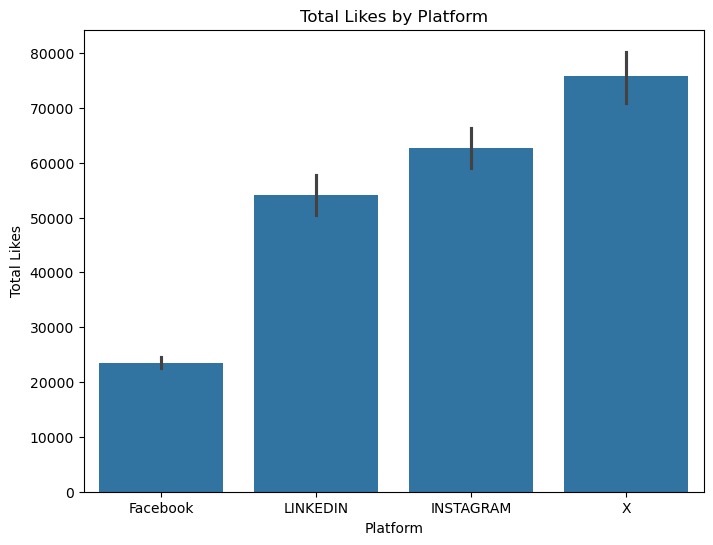

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.barplot(data=all_data, x='Source_Sheet', y='Likes', estimator='sum')
plt.title("Total Likes by Platform")
plt.ylabel("Total Likes")
plt.xlabel("Platform")
plt.show()


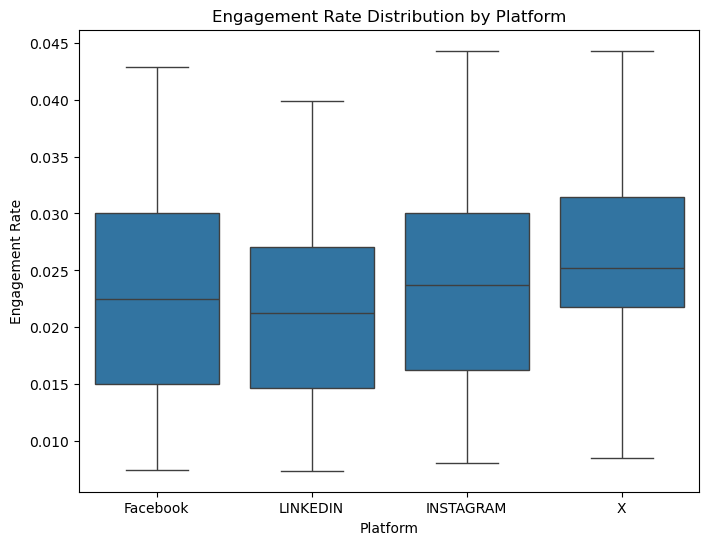

In [6]:
plt.figure(figsize=(8,6))
sns.boxplot(data=all_data, x='Source_Sheet', y='Engagement Rate')
plt.title("Engagement Rate Distribution by Platform")
plt.ylabel("Engagement Rate")
plt.xlabel("Platform")
plt.show()


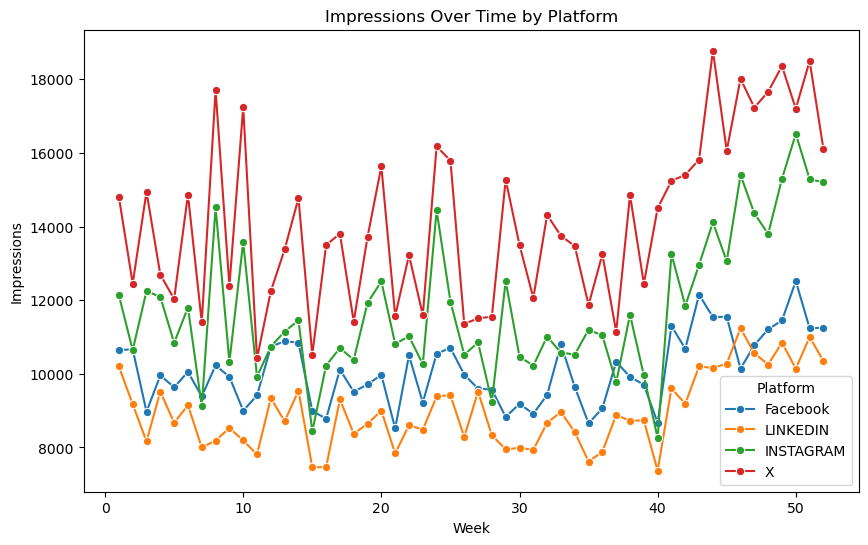

In [7]:
plt.figure(figsize=(10,6))
sns.lineplot(data=all_data, x='Week', y='Impressions', hue='Source_Sheet', marker="o")
plt.title("Impressions Over Time by Platform")
plt.ylabel("Impressions")
plt.xlabel("Week")
plt.legend(title="Platform")
plt.show()


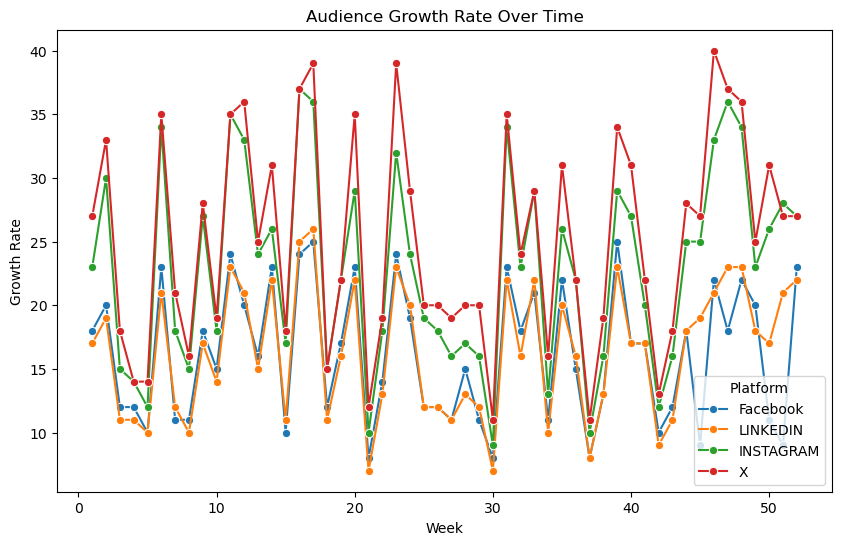

In [8]:
plt.figure(figsize=(10,6))
sns.lineplot(data=all_data, x='Week', y='Audience Growth Rate', hue='Source_Sheet', marker="o")
plt.title("Audience Growth Rate Over Time")
plt.ylabel("Growth Rate")
plt.xlabel("Week")
plt.legend(title="Platform")
plt.show()


In [23]:
from IPython.display import Markdown, display

# ÿ≠ÿ≥ÿßÿ® ÿ®ÿπÿ∂ ÿßŸÑŸÖÿ™ÿ∫Ÿäÿ±ÿßÿ™ ÿ•ÿ∞ÿß ŸÑŸÖ ÿ™ŸÉŸÜ ŸÖÿπÿ±ŸÅÿ©
top_engagement_platform = platform_engagement.idxmax()
top_likes_platform = platform_likes.idxmax()
top_growth_platform = platform_growth.idxmax()

markdown_text = """
# üìä Summary & Key Insights ‚Äì Social Media Performance

---

## üü¢ **General KPIs:**
- **Total Likes:**  `{total_likes:,}`  
- **Total Impressions:** `{total_impressions:,}`  
- **Total Reach:** `{total_reach:,}`  
- **Average Engagement Rate:** `{avg_engagement_rate:.2f}`  
- **Average Response Rate:** `{avg_response_rate:.2f}`  
- **Number of Weeks Analyzed:** `{unique_weeks}`  
- **Number of Platforms Covered:** `{unique_platforms}`

---

## ‚è±Ô∏è **Performance Over Time:**
- The week with the highest impressions was **Week {top_week_impressions}**.
- Engagement rates showed fluctuations across weeks, suggesting inconsistencies in content or timing.
- Audience growth was strongest on certain platforms, indicating potential for follower acquisition.

---

## üì± **Platform Insights:**
- **Highest Engagement Rate:** `{top_engagement_platform}`  
- **Most Total Likes:** `{top_likes_platform}`  
- **Fastest Audience Growth:** `{top_growth_platform}`  

---

## üéØ **Audience & Behavior:**
- Platforms differ significantly in engagement, likes, and audience growth.
- Strategic content tailored to platform-specific behavior can boost performance.
- Audience response rates were relatively high across platforms (~85%), indicating healthy interaction.

---

## ‚úÖ **Recommendations:**
- Focus on **{top_engagement_platform}**, the platform with the highest engagement rate.
- Reuse or boost high-performing content during **Week {top_week_impressions}**.
- Improve consistency across weeks by analyzing content type and posting schedules.
- Use insights from top-performing platforms to improve others (e.g., content tone, format).
- Track engagement and growth metrics weekly to fine-tune strategy in real time.

---

üìù *This dashboard summarizes key metrics and insights from social media performance, supporting data-driven content and marketing strategies.*
""".format(
    total_likes=total_likes,
    total_impressions=total_impressions,
    total_reach=total_reach,
    avg_engagement_rate=avg_engagement_rate,
    avg_response_rate=avg_response_rate,
    unique_weeks=unique_weeks,
    unique_platforms=unique_platforms,
    top_week_impressions=top_week_impressions,
    top_engagement_platform=top_engagement_platform,
    top_likes_platform=top_likes_platform,
    top_growth_platform=top_growth_platform
)

# ÿπÿ±ÿ∂ Markdown ÿØÿßÿÆŸÑ Jupyter
display(Markdown(markdown_text))




# üìä Summary & Key Insights ‚Äì Social Media Performance

---

## üü¢ **General KPIs:**
- **Total Likes:**  `216,038`  
- **Total Impressions:** `2,341,079`  
- **Total Reach:** `1,643,498`  
- **Average Engagement Rate:** `0.02`  
- **Average Response Rate:** `0.85`  
- **Number of Weeks Analyzed:** `52`  
- **Number of Platforms Covered:** `4`

---

## ‚è±Ô∏è **Performance Over Time:**
- The week with the highest impressions was **Week 44**.
- Engagement rates showed fluctuations across weeks, suggesting inconsistencies in content or timing.
- Audience growth was strongest on certain platforms, indicating potential for follower acquisition.

---

## üì± **Platform Insights:**
- **Highest Engagement Rate:** `X`  
- **Most Total Likes:** `X`  
- **Fastest Audience Growth:** `X`  

---

## üéØ **Audience & Behavior:**
- Platforms differ significantly in engagement, likes, and audience growth.
- Strategic content tailored to platform-specific behavior can boost performance.
- Audience response rates were relatively high across platforms (~85%), indicating healthy interaction.

---

## ‚úÖ **Recommendations:**
- Focus on **X**, the platform with the highest engagement rate.
- Reuse or boost high-performing content during **Week 44**.
- Improve consistency across weeks by analyzing content type and posting schedules.
- Use insights from top-performing platforms to improve others (e.g., content tone, format).
- Track engagement and growth metrics weekly to fine-tune strategy in real time.

---

üìù *This dashboard summarizes key metrics and insights from social media performance, supporting data-driven content and marketing strategies.*
